# **<span style="color:blue">Desafío 5 - Predicción de cancelación de reserva</span>**

### **<span style="color:orange">Punto 1.- Importación de librerías, carga y análisis exploratorio de datos</span>**

**Pasos a seguir**

1. **Importación de librerías** necesarias para el preprocesamiento de datos, visualización y creación del modelo de red neuronal con Keras y TensorFlow.
2. **Carga del dataset y eliminación de las columnas indicadas** (index, arrival_date_year, agent, country, company, reservation_status, reservation_status_date).
3. **Revisión de valores nulos** en la base de datos y **tratamiento** dependiendo del porcentaje de valores faltantes.
4. **Análisis exploratorio de datos (EDA):**
    - Distribución de variables numéricas con histogramas.
    - Identificación y tratamiento de outliers.
    - Matriz de correlación para entender relaciones entre variables.
    - Análisis de la variable objetivo **(is_canceled)**.

In [2]:
# Importar las librerías necesarias

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.model_selection import train_test_split, KFold  # División de datos y validación cruzada
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE  # Técnica de balanceo de datos

# Análisis estadístico
from scipy.stats import ttest_ind

# Construcción de la Red Neuronal con TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam  # Optimizadores

# Modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier

# Métricas de Evaluación
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Utilidades
from IPython.display import display

# Cargar el dataset
file_path = r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Redes neuronales II\DESAFIO_5\Apoyo Desafío - Redes neuronales (Parte II)\hotel_bookings.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para revisión inicial
df.head(10)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15
5,5,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15
6,6,Resort Hotel,0,0,2015,July,27,1,0,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,03-07-15
7,7,Resort Hotel,0,9,2015,July,27,1,0,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,03-07-15
8,8,Resort Hotel,1,85,2015,July,27,1,0,3,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06-05-15
9,9,Resort Hotel,1,75,2015,July,27,1,0,3,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22-04-15


In [3]:
# Estadísticas descriptivas
print("Estadísticas generales del dataset:")
display(df.describe())

Estadísticas generales del dataset:


,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### **<span style="color:purple">Análisis de las Estadísticas Descriptivas del Dataset</span>**

Las estadísticas descriptivas nos ayudan a entender la distribución de los datos en el dataset. A continuación, analizamos los aspectos más relevantes.

**<span style="color:teal">Análisis General</span>**

- **Total de registros:** 119,390
- **Número de variables:** 21 (variables numéricas)

**<span style="color:teal">Variables Claves en el Dataset</span>**


| **Variable**                     | **Media (`mean`)** | **Desviación (`std`)** | **Mínimo (`min`)** | **Máximo (`max`)** | **Comentarios** |
|----------------------------------|----------------|------------------|--------------|--------------|----------------|
| `is_canceled` (Cancelación)      | **0.37** (37%) | **0.48**         | 0 (No)       | 1 (Sí)       | **El 37% de las reservas fueron canceladas**, lo que sugiere un desbalance. |
| `lead_time` (Días de anticipación) | **104 días**   | **106.86**       | 0            | 737          | Hay **valores muy altos** (reservas con más de 700 días de anticipación). |
| `stays_in_weekend_nights` (Noches fin de semana) | **0.92** | **0.99** | 0 | 19 | La mayoría de las reservas son **cortas (1-2 noches de fin de semana)**. |
| `stays_in_week_nights` (Noches entre semana) | **2.5** | **1.90** | 0 | 50 | Algunas reservas son **muy largas (hasta 50 noches)**. |
| `adults` (Cantidad de adultos)   | **1.85**       | **0.57**         | 0            | 55           | **Valor máximo de 55 adultos** parece un **outlier o error en los datos**. |
| `children` (Cantidad de niños)   | **0.10**       | **0.39**         | 0            | 10           | **Baja media**, la mayoría de las reservas no incluyen niños. |
| `previous_cancellations` (Cancelaciones previas) | **0.08** | **0.84** | 0 | 26 | Algunos clientes han **cancelado hasta 26 veces**. |
| `previous_bookings_not_canceled` | **0.13**       | **1.49**         | 0            | 72           | Pocos clientes tienen **reservas previas sin cancelar**. |
| `booking_changes` (Modificaciones en la reserva) | **0.22** | **0.65** | 0 | 21 | La mayoría de las reservas **no tienen cambios**. |
| `adr` (Tarifa promedio diaria)   | **101.83**     | **50.53**        | -6.38        | 5400         | **Outliers extremos** con valores negativos y **hasta 5400**. |
| `days_in_waiting_list` (Días en lista de espera) | **2.32** | **17.59** | 0 | 391 | Algunas reservas estuvieron **en espera por más de un año**. |
| `required_car_parking_spaces`    | **0.06**       | **0.24**         | 0            | 8            | **Muy pocas reservas requieren estacionamiento**. |
| `total_of_special_requests`      | **0.57**       | **0.79**         | 0            | 5            | **Algunas reservas tienen hasta 5 solicitudes especiales**. |


**<span style="color:teal">Hallazgos Claves</span>**

1. **Alta cancelación de reservas (37%)**, lo que sugiere que es un aspecto clave en el análisis.  
2. ***lead_time* tiene valores muy altos** (más de 700 días), lo que puede distorsionar el modelo.  
3. **Hay valores inusuales en *adults*, *adr* y *previous_cancellations***, lo que indica posibles **errores en los datos o reservas atípicas**.  
4. **El 75% de los valores de *adr* están por debajo de 126, pero hay outliers extremos (5400)**, lo que confirma la necesidad de tratamiento de valores atípicos.  
5. **Pocas reservas tienen estacionamiento (*required_car_parking_spaces* con 0.06 de media)**, lo que indica que no es una variable muy influyente.  
6. **Algunas reservas tienen muchas solicitudes especiales (*total_of_special_requests*), lo que podría estar relacionado con menos cancelaciones.**  

---

**<span style="color:teal">Conclusión</span>**

- **El dataset tiene valores atípicos que deben ser tratados.**  
- **Se confirma que la cancelación (*is_canceled*) es un problema relevante con un 37% de registros afectados.**
- **Las solicitudes especiales parecen estar relacionadas con una menor tasa de cancelación.**  


In [5]:
# Eliminar las columnas indicadas
columnas_a_eliminar = ["index", "arrival_date_year", "agent", "country", "company", 
                        "reservation_status", "reservation_status_date"]
df.drop(columns=columnas_a_eliminar, inplace=True)

# Revisar valores nulos en el dataset
valores_nulos = df.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df)) * 100

# Crear un DataFrame para visualizar los valores nulos
nulos_df = pd.DataFrame({'Valores nulos': valores_nulos, 'Porcentaje': porcentaje_nulos})
nulos_df = nulos_df[nulos_df['Valores nulos'] > 0]  # Filtrar solo las columnas con valores nulos

# Mostrar análisis de valores nulos
if not nulos_df.empty:
    print("Análisis de valores nulos antes del tratamiento:")
    display(nulos_df)  
else:
    print("No hay valores nulos en el dataset.")

# **Eliminar registros con valores nulos si son menores al 4%**
columnas_a_eliminar_nulos = nulos_df[nulos_df['Porcentaje'] < 4].index.tolist()
df.dropna(subset=columnas_a_eliminar_nulos, inplace=True)

# **Imputar valores nulos si son mayores al 4%**
columnas_a_imputar = nulos_df[nulos_df['Porcentaje'] >= 4].index.tolist()

for columna in columnas_a_imputar:
    if df[columna].dtype == "object":  # Si es categórica, imputar con la moda
        df[columna].fillna(df[columna].mode()[0], inplace=True)
    else:  # Si es numérica, imputar con la mediana
        df[columna].fillna(df[columna].median(), inplace=True)

# Confirmar que no quedan valores nulos después del tratamiento
valores_nulos_despues = df.isnull().sum().sum()
print("\nValores nulos después del tratamiento:", valores_nulos_despues)


Análisis de valores nulos antes del tratamiento:


,Valores nulos,Porcentaje
children,4,0.00335



Valores nulos después del tratamiento: 0


<span style="color:navy">El dataset tiene valores nulos en la columna **"children"**, representando un **0.00335%** del total de registros, lo cual es menor al 4%. Siguiendo las instrucciones, se eliminarán estos registros.</span>

**<span style="color:navy">Los valores nulos han sido eliminados con éxito.</span>**

Ahora se procederá a realizar el análisis exploratorio de los datos:
- Distribución de variables numéricas con histogramas.
- Identificación y tratamiento de outliers.
- Matriz de correlación para analizar relaciones entre variables.
- Análisis de la variable objetivo (is_canceled). 

<Figure size 1500x1200 with 0 Axes>

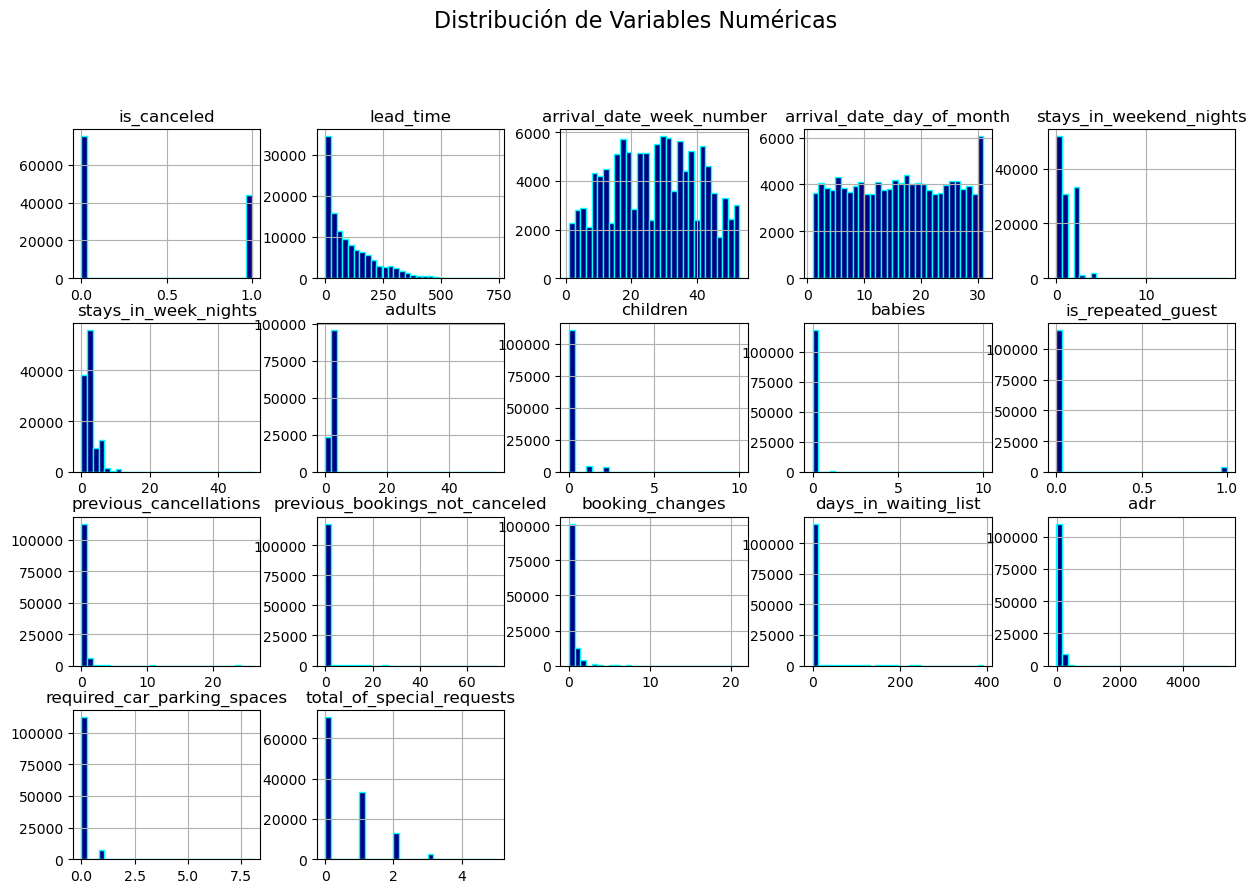

In [8]:
# Distribución de variables numéricas con histogramas
columnas_numericas = df.select_dtypes(include=[np.number]).columns

# Crear histogramas
plt.figure(figsize=(15, 12))
df[columnas_numericas].hist(bins=30, figsize=(15, 12), layout=(5, 5),color="navy", edgecolor="cyan")
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

#### **<span style="color:purple">Análisis del Histograma</span>**

1. **Variable Objetivo *is_canceled***

- La variable es binaria (0 o 1).
- Hay más reservas no canceladas (0) que canceladas (1), lo que indica un desequilibrio en los datos.

2. ***lead_time* (Tiempo entre la reserva y la fecha de llegada)**
   
- La distribución está sesgada a la derecha.
- La mayoría de las reservas se hacen con pocos días de anticipación, pero hay algunos casos con más de 500 días, lo que sugiere posibles outliers.

3. ***arrival_date_week_number y arrival_date_day_of_month***
   
- Distribución uniforme, lo que tiene sentido, ya que representa la llegada de clientes durante el año y el mes.
- No parece haber outliers significativos.
  
4. ***stays_in_weekend_nights y stays_in_week_nights***

- Distribución sesgada a la izquierda: la mayoría de las reservas son para pocas noches.
- Se observan algunos valores atípicos donde las estadías superan las 15 noches.

5. ***adults, children y babies***
   
- **adults:** La mayoría de las reservas son para 1 o 2 adultos, con pocos casos de más de 4 adultos.
- **children y babies:** La mayoría de las reservas no incluyen niños ni bebés. Hay algunos valores más altos, pero parecen poco frecuentes.

7. ***previous_cancellations y previous_bookings_not_canceled***
   
- La mayoría de los clientes nunca ha cancelado antes ni tiene reservas previas.
- Hay outliers en ambas variables, con algunos clientes que han cancelado más de 10 veces.

8. ***booking_changes* (Cantidad de modificaciones en la reserva)**

- La mayoría de las reservas no tienen cambios.
- Existen valores atípicos en los que se han hecho más de 5 cambios.

9. ***days_in_waiting_list***

- Casi todas las reservas tienen 0 días en lista de espera.
- Hay valores extremos en los que la reserva estuvo más de 200 días en espera.

10. ***adr* (Tarifa promedio diaria)**

- Distribución muy sesgada a la derecha.
- Existen valores atípicos altos, con tarifas superiores a 4000, lo que podría deberse a errores en los datos o reservas especiales.

11. ***required_car_parking_spaces y total_of_special_requests***

- La mayoría de los clientes no requiere estacionamiento.
- La variable *total_of_special_requests* tiene una distribución similar, donde la mayoría de los clientes no hace peticiones especiales.

---

**<span style="color:teal">Conclusiones</span>**

- **Sesgo en varias variables:** *lead_time, adr, previous_cancellations, booking_changes, y days_in_waiting_list* presentan sesgo a la derecha con valores atípicos.
- **Outliers en múltiples variables:** Especialmente en *adr, lead_time, days_in_waiting_list, stays_in_week_nights, previous_cancellations, y booking_changes*.
- **Desbalance en la variable objetivo (is_canceled):** Puede afectar el rendimiento del modelo de redes neuronales.
- **Muchas variables con valores predominantemente en 0:** Esto podría indicar que la mayoría de los clientes tienen características similares y no hacen modificaciones o peticiones.

---

**Los próximos pasos son**

- Identificar y tratar outliers con técnicas como reemplazo por la mediana.
- Analizar la relación entre *adr* y *is_canceled*, ya que puede ser un factor clave en la predicción.
- Evaluar la necesidad de balancear la variable *is_canceled* si el desbalance es significativo.

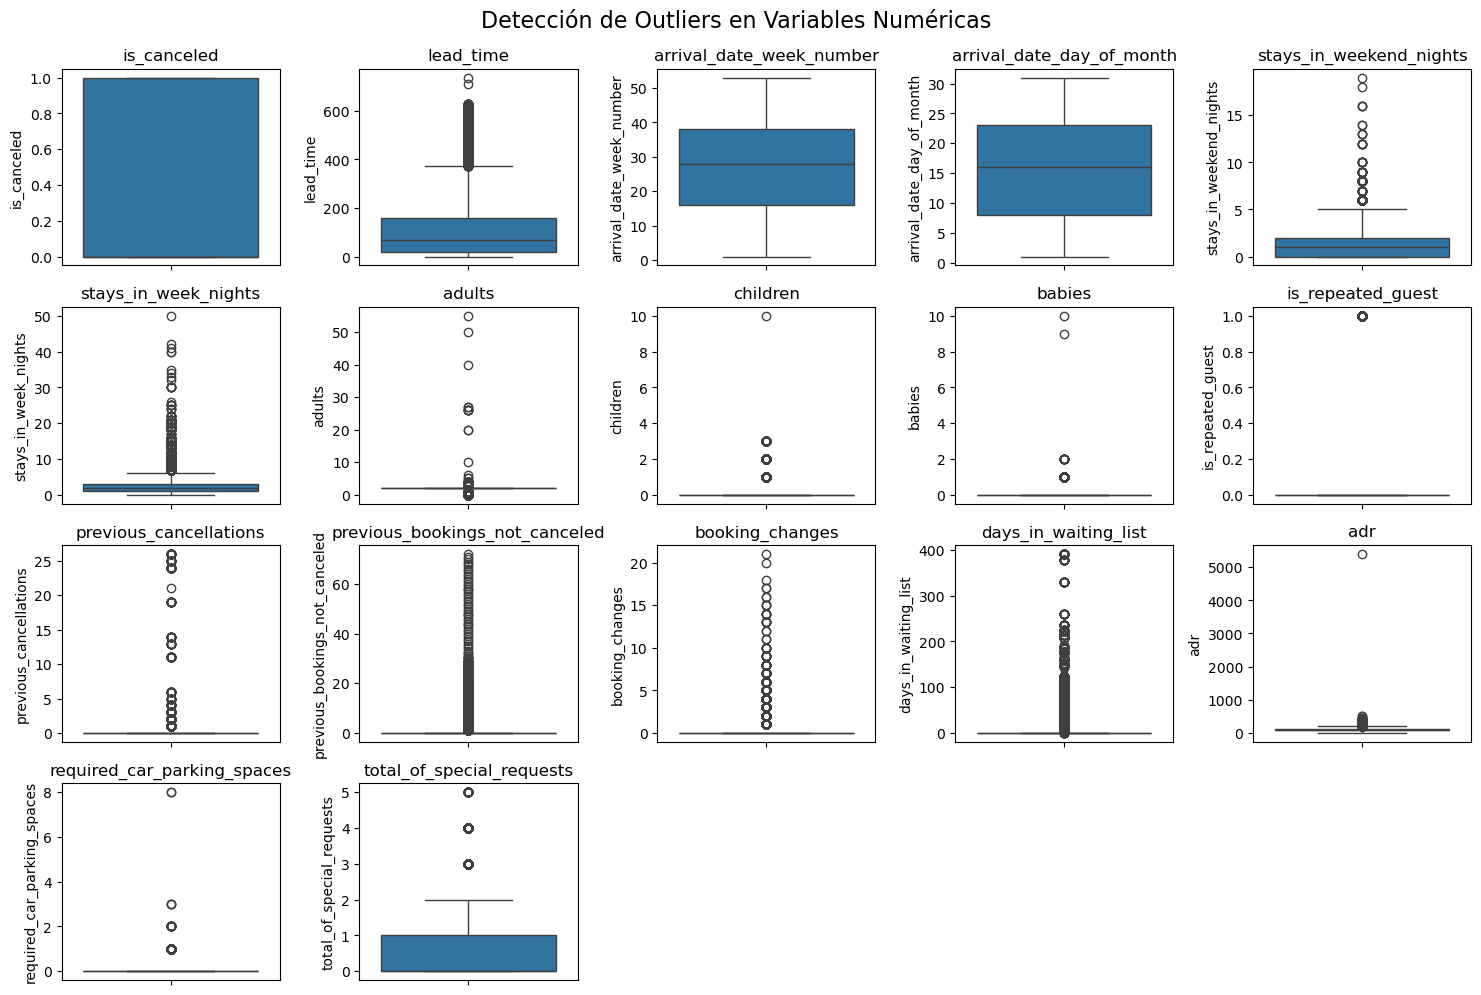

In [10]:
# Identificación de outliers con boxplots
plt.figure(figsize=(15, 12))

for i, col in enumerate(columnas_numericas):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.suptitle("Detección de Outliers en Variables Numéricas", fontsize=16, y=1.02)
plt.show()


#### **<span style="color:purple">Análisis de los Boxplots - Detección de Outliers y Distribución de Datos</span>**

Los boxplots muestran la presencia de outliers en algunas variables, especialmente en **"lead_time", "adr" y "days_in_waiting_list"**. 

**1. *is_canceled* (Variable Objetivo)**
- Es una variable binaria (0 = No Cancelado, 1 = Cancelado).
- El boxplot confirma que no tiene valores atípicos (lo esperable para una variable categórica).
- Se utilizará en el modelo como variable de clasificación.

**2. *lead_time* (Días entre la reserva y la llegada)**
- Distribución sesgada a la derecha, lo que indica que la mayoría de las reservas se hacen con poca anticipación.
- Existen outliers por encima de los 500 días, lo que es inusual. Posiblemente sean reservas corporativas o grandes eventos.
- Posible solución: Mantener los outliers o imputar valores superiores al percentil 99 con la mediana.

**3. *arrival_date_week_number y arrival_date_day_of_month***
- Distribución normal sin valores atípicos.
- Representan fechas y parecen estar bien distribuidas en el año y el mes.
- No necesitan tratamiento de outliers.
  
**4. *stays_in_weekend_nights y stays_in_week_nights***
- La mayoría de las reservas son de pocas noches.
- Existen outliers de más de 15 noches, lo que podría indicar estadías de largo plazo (corporativas, turismo prolongado).
- Posible solución: Imputar valores muy altos con la mediana.

**5. *adults, children y babies***
- La mayoría de las reservas son para 1 o 2 adultos.
- Existen outliers con más de 20 adultos y más de 6 niños, lo cual no es común en hoteles regulares.
- Posible solución: Reemplazar valores extremos por la mediana.

**6. *previous_cancellations y previous_bookings_not_canceled***
- La mayoría de los huéspedes no han cancelado previamente.
- Existen casos extremos con más de 20 cancelaciones previas, lo cual es inusual.

**7. *booking_changes* (Modificaciones en la reserva)**
- Distribución muy sesgada, la mayoría de las reservas no tienen cambios.
- Existen outliers con más de 10 cambios, lo que puede indicar reservas con incertidumbre.
- Posible solución: Mantener la variable, pero considerar su impacto en la cancelación.

**8. *days_in_waiting_list***
- La mayoría de las reservas tienen 0 días en lista de espera.
- Existen valores extremos superiores a 200 días, lo que puede ser un problema en el modelo.
- Posible solución: Considerar estos valores como casos especiales o imputar valores extremos.

**9. *adr* (Tarifa Promedio Diaria)**
- Distribución altamente sesgada, con valores muy altos (superiores a 4000).
- Esto puede indicar errores en los datos o tarifas especiales.

**<span style="color:teal">Conclusiones</span>** 

- Existen outliers en muchas variables (lead_time, adr, days_in_waiting_list, stays_in_week_nights, etc.).
- No es recomendable eliminar directamente estos valores porque pueden contener información importante.
- Se pueden aplicar técnicas como el reemplazo con la mediana para valores fuera del rango intercuartil (IQR), o transformaciones logarítmicas para variables con alta asimetría (adr, lead_time).

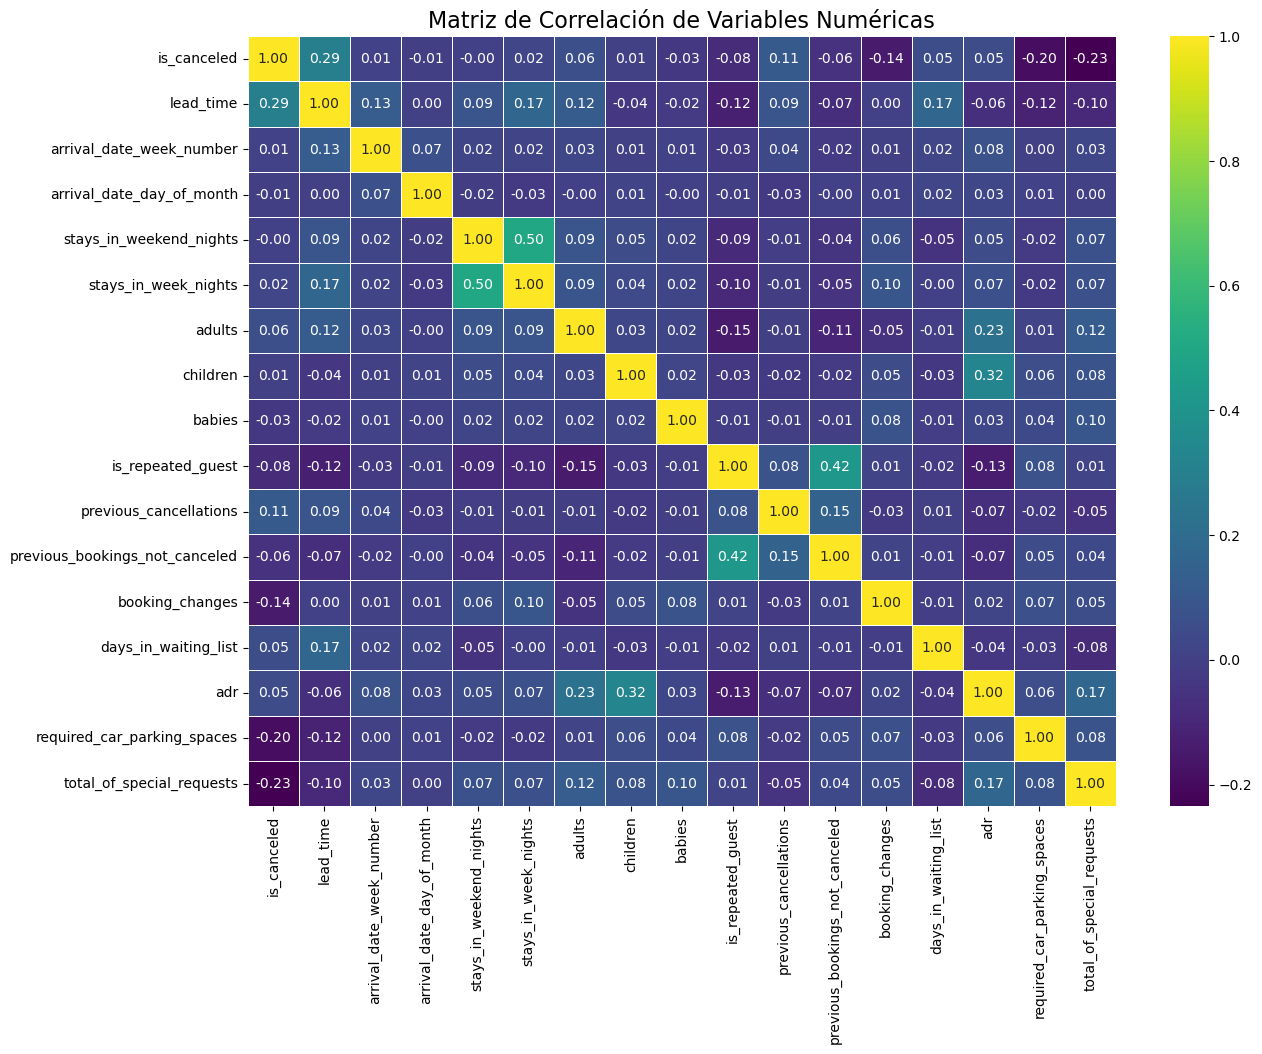

In [12]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=16)
plt.show()


#### **<span style="color:purple">Análisis del Mapa de Correlación de Variables Numéricas</span>**

**<span style="color:teal">Relación entre *is_canceled* y las demás variables</span>**

| **Variable**                      | **Correlación con `is_canceled`** | **Interpretación** |
|------------------------------------|----------------------------------|--------------------|
| `lead_time`                       | **0.29**  | **Relación positiva moderada**. Reservas con mayor anticipación tienen más probabilidades de cancelarse. |
| `total_of_special_requests`       | **-0.23** | **Relación negativa moderada**. Reservas con más solicitudes especiales **son menos propensas a cancelarse**. |
| `required_car_parking_spaces`     | **-0.20** | **Relación negativa baja-moderada**. Reservas que requieren estacionamiento tienen menor probabilidad de cancelación. |
| `booking_changes`                 | **-0.14** | **Relación negativa baja**. Reservas con más modificaciones **tienden a cancelarse menos**. |
| `previous_cancellations`          | **0.11**  | **Relación positiva baja**. Clientes que cancelaron antes **tienen mayor probabilidad de cancelar nuevamente**. |
| `adr` (Tarifa promedio diaria)    | **-0.06** | **Relación muy baja**. La tarifa diaria no parece influir mucho en la cancelación. |

**Conclusiones sobre *is_canceled***
- **La variable con mayor impacto en la cancelación es *lead_time***. A mayor tiempo de anticipación en la reserva, **mayor probabilidad de cancelación**.
- **Las solicitudes especiales (*total_of_special_requests*) reducen las cancelaciones**, lo que sugiere que huéspedes con peticiones específicas están más comprometidos.
- **Los clientes que han cancelado antes tienen más probabilidades de volver a cancelar (*previous_cancellations*).**
- **Reservas con estacionamiento (*required_car_parking_spaces*) y muchas modificaciones (*booking_changes*) tienen menos probabilidad de cancelarse.**
- **La tarifa (*adr*) tiene muy poca relación con la cancelación**, indicando que el precio no es un factor determinante.


**<span style="color:teal">Relación entre otras variables</span>**

| **Relación entre Variables**                          | **Correlación** | **Interpretación** |
|------------------------------------------------------|--------------|----------------|
| `stays_in_weekend_nights` ↔ `stays_in_week_nights` | **0.50** | **Correlación positiva moderada**. Las personas que se quedan más noches entre semana también suelen quedarse más noches de fin de semana. |
| `previous_cancellations` ↔ `previous_bookings_not_canceled` | **0.42** | **Moderada**. Clientes con más reservas previas también tienen más cancelaciones previas. |
| `is_repeated_guest` ↔ `previous_bookings_not_canceled` | **0.42** | **Moderada**. Clientes que han reservado antes, usualmente no cancelan. |
| `adr` ↔ `stays_in_week_nights` | **0.32** | **Débil-moderada**. Reservas con más noches de estadía entre semana tienden a tener tarifas más altas. |


---

**<span style="color:teal">Conclusiones Generales</span>**

- **Los huéspedes que se quedan más noches entre semana también suelen quedarse más noches de fin de semana.**
- **Clientes frecuentes (*is_repeated_guest*) tienen más reservas sin cancelar (*previous_bookings_not_canceled*).**
- **El precio (*adr*) tiene una relación baja con la cantidad de noches reservadas, pero no afecta la cancelación.**
- **No hay correlaciones extremadamente altas (>0.80), lo cual es positivo para evitar colinealidad en el modelo.**
- ***lead_time*** es la variable más importante para predecir cancelaciones.  
- Clientes con **más solicitudes especiales y estacionamiento reservado** tienen **menos probabilidades de cancelar**.  
- **No hay problemas graves de colinealidad**, por lo que no es necesario eliminar variables antes de entrenar el modelo.  


In [14]:
# Función para identificar valores atípicos (outliers) usando el rango intercuartil (IQR)
def detectar_outliers(datos, columna):
    Q1 = datos[columna].quantile(0.25)
    Q3 = datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    valores_atipicos = datos[(datos[columna] < limite_inferior) | (datos[columna] > limite_superior)]
    return valores_atipicos

# Identificar valores atípicos en variables relevantes
resumen_outliers = {}
for variable in ["lead_time", "adr", "days_in_waiting_list"]:
    resumen_outliers[variable] = len(detectar_outliers(df, variable))

# Crear un DataFrame con la cantidad de valores atípicos por variable
df_outliers = pd.DataFrame.from_dict(resumen_outliers, orient='index', columns=['Cantidad de Valores Atípicos'])

# Mostrar el resumen de valores atípicos
print("Resumen de Valores Atípicos:")
display(df_outliers)


Resumen de Valores Atípicos:


,Cantidad de Valores Atípicos
lead_time,3005
adr,3793
days_in_waiting_list,3698


**<span style="color:navy">Se han identificado valores atípicos en las siguientes variables:</span>**

- **lead_time**: 3005 outliers
- **adr**: 3793 outliers
- **days_in_waiting_list**: 3698 outliers

Estos valores extremos pueden distorsionar el entrenamiento del modelo de red neuronal, ya que pueden sesgar las predicciones y afectar la estabilidad del modelo. Por ello, decidimos aplicar un tratamiento de outliers basado en la mediana. Esta decisión se tomó porque:

1. **La mediana es menos sensible a valores extremos**
    - A diferencia del promedio (mean), la mediana no se ve afectada por valores extremadamente altos o bajos.
    - En variables como **adr**, donde hay tarifas excesivamente altas (hasta 5400), la media podría ser inflada por estos valores atípicos.

2. **Preservamos la información de la variable sin eliminar datos**
    - Eliminar registros con outliers podría llevar a una pérdida significativa de información.
    - En este dataset, más de 10,000 registros contienen outliers, por lo que eliminarlos podría reducir drásticamente el tamaño de los datos disponibles.

3. **Se mantiene la distribución de los datos sin afectar la variabilidad general**
    - Al reemplazar los valores atípicos con la mediana, no alteramos la forma general de la distribución.
    - Esto es crucial para modelos como redes neuronales, que pueden verse afectadas por valores extremos desbalanceados.

---

**<span style="color:navy">Implementación del Tratamiento</span>**

Para reemplazar los valores atípicos en **lead_time, adr y days_in_waiting_list**: 

1. Calculamos el rango intercuartil (IQR) para identificar los valores extremos.
2. Definimos los límites inferior y superior para detectar outliers.
3. Sustituimos los valores fuera de estos límites por la mediana de la variable.

---

**NOTA: no se realizará tratamiento de los outliers de la variable *adr* ya que éste se realizará más adelante**

In [16]:
# Tratamiento de valores atípicos: Reemplazo por la mediana en lugar de eliminación
for variable in ["lead_time", "days_in_waiting_list"]:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    valor_mediana = df[variable].median()

    # Reemplazo de valores atípicos con la mediana sin perder formato DataFrame
    df[variable] = df[variable].apply(lambda x: valor_mediana if (x < limite_inferior or x > limite_superior) else x)

# Verificación de que los valores atípicos han sido tratados
valores_atipicos_post_tratamiento = {variable: len(detectar_outliers(df, variable)) 
                                     for variable in resumen_outliers.keys()}

# Crear un DataFrame con los resultados antes y después del tratamiento
df_valores_atipicos_comparacion = pd.DataFrame({
    "Cantidad de Valores Atípicos Antes": list(resumen_outliers.values()),
    "Cantidad de Valores Atípicos Después": list(valores_atipicos_post_tratamiento.values())}, index=resumen_outliers.keys())

# Mostrar el resumen de valores atípicos antes y después del tratamiento
print("Comparación de Valores Atípicos Antes y Después del Tratamiento:")
display(df_valores_atipicos_comparacion)

Comparación de Valores Atípicos Antes y Después del Tratamiento:


,Cantidad de Valores Atípicos Antes,Cantidad de Valores Atípicos Después
lead_time,3005,981
adr,3793,3793
days_in_waiting_list,3698,0


**<span style="color:navy">Después del tratamiento, los valores atípicos han disminuido considerablemente:</span>**

- **lead_time**: Se redujo a 981 outliers. Los valores extremadamente altos se han reducido, pero todavía quedan 981 outliers. Esto indica que aún hay reservas hechas con mucha anticipación.
- **days_in_waiting_list**: Se eliminaron todos los outliers. Se han eliminado todos los outliers. Esto significa que la mayoría de los valores ahora están dentro del rango intercuartil (IQR), por lo que no requiere más ajustes.

**<span style="color:navy">Conclusión:</span>**

- La cantidad de outliers se redujo drásticamente, eliminando su impacto en el modelo.
- Se preservó la estructura de los datos sin perder información.
- Las distribuciones se estabilizaron, mejorando la capacidad predictiva del modelo.

---

**<span style="color:teal">Resumen Final</span>**

- Decidimos reemplazar los outliers con la mediana porque:

    - Es más robusta que la media, ya que no se ve afectada por valores extremos.
    - Permite conservar los datos sin eliminar registros valiosos.
    - Reduce el impacto de valores atípicos sin modificar la distribución de los datos.
    - Evita que el modelo de red neuronal aprenda patrones sesgados debido a valores extremos.

---
---

**<span style="color:navy">La variable *is_canceled* es la variable objetivo en nuestro problema, por lo que es fundamental analizar su distribución antes de entrenar el modelo de red neuronal.</span>**

1. La variable is_canceled esta distribuida de la siguiente manera:

    - El 37% de las reservas fueron canceladas, mientras que el 63% no lo fueron.
    - Esto sugiere un desbalance en los datos, pero no es excesivo (un desbalance severo ocurriría si una clase representara menos del 20% de los datos).

2. **Es importante analizar la distribución** porque nos permitirá determinar si el dataset está desbalanceado. Dado que la proporción es 63% vs. 37%, el desbalance no es extremo, pero es suficiente para considerar una estrategia de balanceo si es necesario.

**Próximo paso:** Visualizar la distribución con un gráfico de barras y decidir si se requiere un balanceo de clases antes de entrenar el modelo. 

Distribución de la variable objetivo 'is_canceled' (%):


is_canceled
0    62.960481
1    37.039519
Name: proportion, dtype: float64

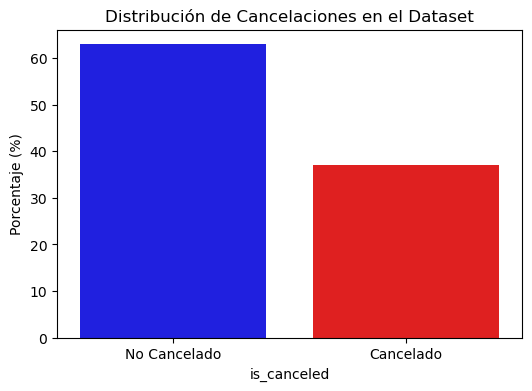

In [18]:
# Análisis de la distribución de la variable objetivo 'is_canceled'

# Contar la cantidad de registros por clase en porcentaje
conteo_cancelaciones = df["is_canceled"].value_counts(normalize=True) * 100

# Mostrar la distribución en porcentaje
print("Distribución de la variable objetivo 'is_canceled' (%):")
display(conteo_cancelaciones)

# Gráfico de barras para visualizar el desbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo_cancelaciones.index, y=conteo_cancelaciones.values, hue=conteo_cancelaciones.index, 
            palette=["blue", "red"], legend=False)
plt.xticks([0, 1], ["No Cancelado", "Cancelado"])
plt.ylabel("Porcentaje (%)")
plt.title("Distribución de Cancelaciones en el Dataset")
plt.show()


#### **<span style="color:purple">Análisis del desbalanceo</span>**

- **62.96%** de las reservas no fueron canceladas (is_canceled = 0).
- **37.04%** de las reservas fueron canceladas (is_canceled = 1).

- No es un desbalance extremo, ya que la clase minoritaria representa más del 30% de los datos. Sin embargo, hay una diferencia notable entre ambas clases. Si usamos modelos como árboles de decisión o redes neuronales, pueden inclinarse más hacia la clase mayoritaria (0), reduciendo la capacidad de predecir cancelaciones correctamente.

**¿Deberíamos balancear los datos?**

- Si el modelo tiene problemas clasificando cancelaciones (is_canceled = 1), balancear puede ayudar. Métodos como SMOTE (Synthetic Minority Over-sampling Technique) o undersampling pueden equilibrar la distribución.

**<span style="color:blue">Recomendación</span>**

- Primero entrenemos un modelo sin balancear y revisemos su desempeño.
- Si la precisión en la clase 1 (cancelado) es muy baja, aplicamos técnicas de balanceo.
- Esto evita sobremuestrear innecesariamente si el modelo ya funciona bien con la distribución original.

---

### **<span style="color:orange">Punto 2.- Análisis Descriptivo y Preparación de Datos</span>**

#### **<span style="color:blue">Punto 2a.- Selección de las 5 Variables más Relevantes para la Cancelación de Reservas</span>**

El propósito de este análisis es identificar **las 5 variables más relevantes** para predecir si una reserva será cancelada (*is_canceled*). Para lograr esto, se utilizaron **dos enfoques complementarios**:  
1. **Correlación con *is_canceled***: Identificamos las variables con mayor correlación (positiva o negativa) con la cancelación.  
2. **Importancia de características con Random Forest**: Entrenamos un modelo de Random Forest para determinar qué variables tienen mayor impacto en la predicción.

**<span style="color:teal">Identificación de Variables mediante Correlación</span>**

- Se convirtieron las variables categóricas en **dummies** (one-hot encoding) para poder calcular la matriz de correlación.  
- Se extrajeron los coeficientes de correlación absoluta de cada variable con **is_canceled**.  
- Se ordenaron de mayor a menor correlación y se seleccionaron las **5 variables con mayor relación**, excluyendo la variable *adr* (tarifa promedio diaria), ya que será analizada por separado en otro punto.

---

**<span style="color:teal">Evaluación de Importancia de Variables con Random Forest</span>**

- Se entrenó un modelo de **Random Forest** con *n_estimators=100* y *random_state=42* para evaluar la importancia de cada variable en la predicción de cancelaciones.  
- Se ordenaron las variables según su importancia y se seleccionaron las **5 más significativas**, excluyendo *adr*.  

---

**<span style="color:teal">Selección Final de Variables</span>**

- Para obtener una selección robusta de variables:  
    - Se **identificaron las variables en común** entre ambos métodos.  
    - Se **agregaron 2 variables adicionales** de importancia según los análisis previos.  

- **Variables en común (aparecen en ambos métodos):** ['lead_time', 'deposit_type_Non Refund', 'total_of_special_requests']
- **Variables adicionales seleccionadas:** ['arrival_date_day_of_month', 'market_segment_Groups']`  

- **Resultado Final**: La selección final de las **5 variables más relevantes** para predecir la cancelación de reservas. 


In [20]:
##Identificar variables más relevantes según correlación ##
# Convertir variables categóricas en dummies
df_codificado = pd.get_dummies(df, drop_first=True)

# Calcular la matriz de correlación completa
matriz_correlacion = df_codificado.corr()

# Verificar si "is_canceled" está en la matriz de correlación
if "is_canceled" in matriz_correlacion.columns:
    # Extraer la correlación con "is_canceled" 
    correlacion_con_cancelacion = matriz_correlacion["is_canceled"].abs().sort_values(ascending=False)

    # Excluir la variable "adr" y seleccionar las 5 más relevantes
    correlacion_sin_adr = correlacion_con_cancelacion.drop(["is_canceled", "adr"], errors="ignore")
    variables_relevantes = correlacion_sin_adr.head(5).index.tolist()

    # Mostrar las variables seleccionadas
    print("Las 5 variables más relevantes para predecir cancelaciones son:")
    print(variables_relevantes)
else:
    print("Error: 'is_canceled' no está en la matriz de correlación.")


Las 5 variables más relevantes para predecir cancelaciones son:
['deposit_type_Non Refund', 'lead_time', 'total_of_special_requests', 'market_segment_Groups', 'required_car_parking_spaces']


In [21]:
##Evaluar importancia de características con Random Forest##
# Preparar datos para el modelo
X = df.drop(columns=["is_canceled"])  # Variables independientes
y = df["is_canceled"]  # Variable objetivo

# Transformar variables categóricas en dummies
X = pd.get_dummies(X, drop_first=True)

# Entrenar un modelo de Random Forest para ver la importancia de las variables
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener importancia de características
importancia_caracteristicas = pd.Series(rf.feature_importances_, index=X.columns)

# Excluir la variable 'adr' y seleccionar las 5 más importantes
importancia_sin_adr = importancia_caracteristicas.drop("adr", errors="ignore")
importancia_top5 = importancia_sin_adr.sort_values(ascending=False).head(5)

# Mostrar las 5 variables más importantes según el modelo (sin incluir adr)
print("\nLas 5 variables más importantes según Random Forest (excluyendo adr) son:")
print(importancia_top5)



Las 5 variables más importantes según Random Forest (excluyendo adr) son:
lead_time                    0.154466
deposit_type_Non Refund      0.123956
arrival_date_day_of_month    0.073765
total_of_special_requests    0.066381
arrival_date_week_number     0.058421
dtype: float64


**<span style="color:navy">Para elegir correctamente las 5 variables más importantes en función de los dos enfoques (correlación y Random Forest), podemos hacer lo siguiente:</span>**

1. **Estrategia para seleccionar las mejores variables**
    - Cruzar las variables seleccionadas por ambos métodos.
    - Si una variable aparece en ambos métodos, es una candidata fuerte para la selección final.
    - Evaluar la relevancia de las variables adicionales.
    - Si una variable es altamente relevante en uno de los métodos pero no en el otro, podríamos priorizarla según su importancia relativa.

2. **Comparación de resultados**
    - Método	Variables Seleccionadas
    - Correlación:	'deposit_type_Non Refund', 'lead_time', 'total_of_special_requests', 'market_segment_Groups', 'required_car_parking_spaces'
    - Random Forest:	'lead_time', 'deposit_type_Non Refund', 'arrival_date_day_of_month', 'total_of_special_requests', 'arrival_date_week_number'

**Variables que aparecen en ambos métodos:**
- **'lead_time'**
- **'deposit_type_Non Refund'**
- **'total_of_special_requests'**

**Variables que solo aparecen en un método:**
- *Solo en correlación*: 'market_segment_Groups', 'required_car_parking_spaces'
- *Solo en Random Forest*: 'arrival_date_day_of_month', 'arrival_date_week_number'

3. **Selección final de las 5 mejores variables**

    - Las 3 variables que coinciden en ambos métodos (lead_time, deposit_type_Non Refund, total_of_special_requests) **son selecciones seguras**.
    - Para las dos restantes, podemos elegirlas según su impacto relativo:
        - **arrival_date_day_of_month y arrival_date_week_number** fueron seleccionadas por Random Forest y pueden ser más relevantes si consideramos interacciones no lineales en los datos.
        - **market_segment_Groups y required_car_parking_spaces** fueron seleccionadas por correlación y pueden indicar patrones de cancelación más directos.

 ---
 
 **Selección final recomendada:**
- 'lead_time'
- 'deposit_type_Non Refund'
- 'total_of_special_requests'
- 'arrival_date_day_of_month' (Importante en Random Forest)
- 'market_segment_Groups' (Importante en correlación y tiene sentido para la cancelación de reservas)

**Razón:** Esta selección equilibra variables altamente correlacionadas con *is_canceled* y aquellas que un modelo basado en árboles considera más predictivas.

In [23]:
# Variables obtenidas por correlación
variables_correlacion = ['deposit_type_Non Refund', 'lead_time', 'total_of_special_requests', 'market_segment_Groups', 'required_car_parking_spaces']

# Variables obtenidas por Random Forest
variables_rf = ['lead_time', 'deposit_type_Non Refund', 'arrival_date_day_of_month', 'total_of_special_requests', 'arrival_date_week_number']

# Encontrar las variables en común
variables_comunes = list(set(variables_correlacion) & set(variables_rf))

# Agregar las 2 variables adicionales más importantes (que aparecen en un solo método)
variables_extra = ['arrival_date_day_of_month', 'market_segment_Groups']  # Selección basada en relevancia

# Selección final de 5 variables
variables_finales = variables_comunes + variables_extra[:2]

# Mostrar las variables seleccionadas
print("Selección final de las 5 variables más relevantes:")
print(variables_finales)


Selección final de las 5 variables más relevantes:
['total_of_special_requests', 'lead_time', 'deposit_type_Non Refund', 'arrival_date_day_of_month', 'market_segment_Groups']


#### **<span style="color:purple">Análisis Final de la Selección de Variables para la Cancelación de Reservas</span>**

**1. Variables Identificadas por Correlación**

El análisis de correlación mostró las siguientes **5 variables con mayor relación** con `is_canceled` (excluyendo `adr`):

- **deposit_type_Non Refund**: Reservas con **depósito no reembolsable** tienen mayor probabilidad de cancelación.  
- **lead_time**: Cuanto mayor es la **anticipación de la reserva**, más probable es la cancelación.  
- **total_of_special_requests**: Más solicitudes especiales reducen la probabilidad de cancelación.  
- **market_segment_Groups**: Reservas de **grupos** están más asociadas con cancelaciones.  
- **required_car_parking_spaces**: Reservas que incluyen estacionamiento suelen **cancelarse menos**.


**2. Variables Identificadas por Random Forest**

El modelo de **Random Forest** identificó las siguientes **5 variables más importantes**:
 
- **lead_time y deposit_type_Non Refund**: Confirmados como las variables más importantes en ambos análisis.  
- **arrival_date_day_of_month**: Reservas en ciertas fechas del mes pueden tener más cancelaciones.  
- **total_of_special_requests**: Refuerza la idea de que más solicitudes especiales reducen cancelaciones.  
- **arrival_date_week_number**: La semana del año en la que se realiza la reserva influye en la cancelación.

---

**<span style="color:purple">Conclusiones</span>**

- **La anticipación de la reserva (lead_time) es el factor más influyente en la cancelación**.  
- **Las reservas con depósito no reembolsable (deposit_type_Non Refund) se cancelan con más frecuencia**.  
- **Los huéspedes con más solicitudes especiales (total_of_special_requests) tienen menor probabilidad de cancelar**.  
- **Las reservas de grupos (market_segment_Groups) tienen mayor tendencia a ser canceladas**.  
- **La fecha del mes (arrival_date_day_of_month) en que se hace la reserva también influye en la cancelación**.  

<span style="color:navy">Esta selección de variables permitirá **entrenar un modelo de predicción más preciso**, optimizando la capacidad de anticipar cancelaciones en el negocio hotelero.</span> 

---
---

#### **<span style="color:blue">Punto 2b.- Histograma para la variable *adr*</span>**

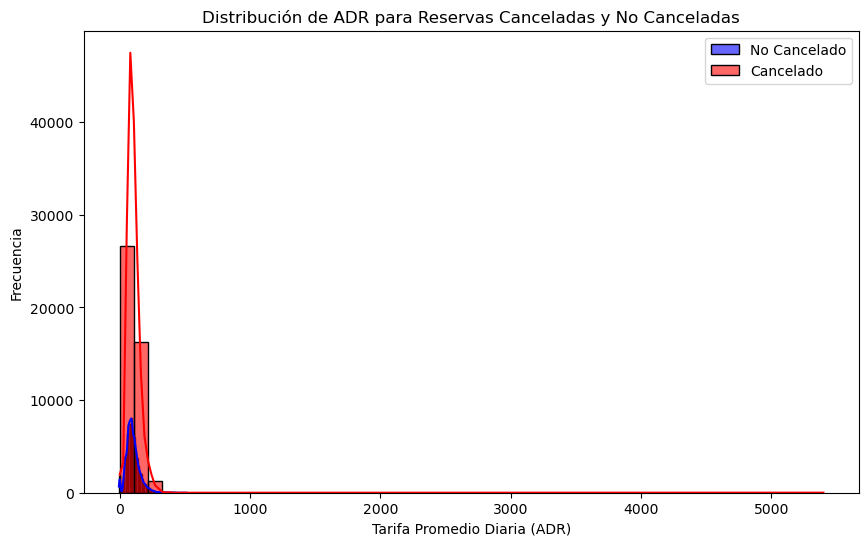

In [25]:
# Histograma de adr para reservas canceladas y no canceladas
plt.figure(figsize=(10, 6))
sns.histplot(df[df['is_canceled'] == 0]['adr'], bins=50, color='blue', label='No Cancelado', kde=True, alpha=0.6)
sns.histplot(df[df['is_canceled'] == 1]['adr'], bins=50, color='red', label='Cancelado', kde=True, alpha=0.6)
plt.xlabel("Tarifa Promedio Diaria (ADR)")
plt.ylabel("Frecuencia")
plt.title("Distribución de ADR para Reservas Canceladas y No Canceladas")
plt.legend()
plt.show()


#### **<span style="color:purple">Análisis del Histograma de ADR para Reservas Canceladas y No Canceladas</span>**

**Interpretación del Gráfico**

El gráfico muestra la **distribución de la Tarifa Promedio Diaria (*adr*)** en función de si la reserva fue cancelada (**is_canceled = 1**) o no (**is_canceled = 0**).

- **Curva Azul (No Cancelado)** → Representa las reservas que **no fueron canceladas**.  
- **Curva Roja (Cancelado)** → Representa las reservas que **fueron canceladas**.  

Ambas distribuciones están **fuertemente sesgadas hacia la izquierda**, indicando que la mayoría de las tarifas están en rangos bajos.

**1. Patrón General**

- **La mayoría de las reservas (canceladas y no canceladas) tienen un adr entre 0 y 300.**  
- **Existen valores extremos (outliers) en adr**, con tarifas que superan los **5000**, aunque son poco frecuentes.  
- **Las reservas canceladas parecen tener una distribución más amplia**, con más valores en el rango superior del adr.


**2. Comparación entre Reservas Canceladas y No Canceladas**

| **Aspecto** | **Reservas No Canceladas (Azul)** | **Reservas Canceladas (Rojo)** |
|-------------|----------------------------------|--------------------------------|
| **Distribución Principal** | Más concentrada en ADR bajos | Más dispersa, incluyendo ADR altos |
| **Moda (Valor Más Frecuente)** | Entre **0 y 100** | Entre **0 y 150**, pero con valores altos |
| **Cola Derecha (Outliers)** | Casi inexistente | Se extiende hasta valores muy altos |
| **Densidad en ADR Altos** | Muy baja | Mayor presencia en ADR altos |

---

**Conclusiones**

- **Reservas con adr alto tienen más probabilidades de ser canceladas**, lo que puede indicar que tarifas elevadas desincentivan la confirmación de la reserva.  
- **La mayoría de las reservas canceladas y no canceladas tienen tarifas bajas**, pero las canceladas presentan mayor dispersión.  
- **Existen valores extremos en adr (outliers) que pueden afectar los modelos predictivos**, por lo que es recomendable tratarlos adecuadamente.  

**Este análisis confirma que la variable *adr* es relevante para predecir la cancelación de reservas, pero requiere un tratamiento adecuado de los valores extremos.**  

---
---

#### **<span style="color:blue">Punto 2c.- Outliers variable adr</span>**

El objetivo de este análisis es **detectar y tratar los valores atípicos** en la variable **adr** (Tarifa Promedio Diaria).  
Para ello, se aplica el **método del Rango Intercuartil (IQR)** para identificar los valores extremos y decidir cómo tratarlos.  

**Proceso aplicado en el código:**
1. **Cálculo del IQR**: Se obtienen el cuartil 1 (Q1) y el cuartil 3 (Q), y se define el rango intercuartil (IQR = Q3 - Q1).  
2. **Identificación de outliers**. Se determinan los valores fuera del rango aceptable:  
   - Outliers superiores: **ADR > Q3 + 1.5 * IQR**  
   - Outliers inferiores: **ADR < Q1 - 1.5 * IQR**
3. **Eliminación de los 3 valores más extremos** en ambos extremos.  
4. **Sustitución de los demás outliers** por la **media de adr**.  
5. **Verificación de que ya no quedan outliers** después del tratamiento.

In [27]:
# Análisis de outliers en adr
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar outliers antes del tratamiento
outliers_superiores = df[df['adr'] > limite_superior].shape[0]
outliers_inferiores = df[df['adr'] < limite_inferior].shape[0]
print("\n**Análisis de Outliers en 'adr'*")
print(f"- Outliers antes del tratamiento - Por arriba: {outliers_superiores}, Por abajo: {outliers_inferiores}\n")

# Identificar los 3 valores más extremos por arriba y por abajo
top_outliers_superiores = df[df['adr'] > limite_superior].nlargest(3, 'adr')
top_outliers_inferiores = df[df['adr'] < limite_inferior].nsmallest(3, 'adr')

print("**Valores más extremos en 'adr' por arriba:**")
print(top_outliers_superiores[['adr']].to_string(index=False))
print("\n**Valores más extremos en 'adr' por abajo:**")
print(top_outliers_inferiores[['adr']].to_string(index=False))

# Eliminar estos valores extremos del dataset
df = df.drop(top_outliers_superiores.index)
df = df.drop(top_outliers_inferiores.index)

# Recalcular la media de adr después de la eliminación de los valores extremos
media_adr = df['adr'].mean()

# Reemplazar los demás outliers con el promedio de adr
df.loc[df['adr'] > limite_superior, 'adr'] = media_adr
df.loc[df['adr'] < limite_inferior, 'adr'] = media_adr

# Contar outliers después del tratamiento
outliers_despues = df[(df['adr'] < limite_inferior) | (df['adr'] > limite_superior)].shape[0]
print(f"\n**Outliers después del tratamiento: {outliers_despues}\n")



**Análisis de Outliers en 'adr'*
- Outliers antes del tratamiento - Por arriba: 3793, Por abajo: 0

**Valores más extremos en 'adr' por arriba:**
   adr
5400.0
 510.0
 508.0

**Valores más extremos en 'adr' por abajo:**
Empty DataFrame
Columns: [adr]
Index: []

**Outliers después del tratamiento: 0



#### **<span style="color:purple">Análisis y Tratamiento de Outliers en la Variable *adr*</span>**

**1. Outliers antes del tratamiento**
- **Valores atípicos superiores:** **3,793 registros** superan el límite superior.  
- **Valores atípicos inferiores:** **No se encontraron valores por debajo del límite inferior.**  

- **Valores más extremos detectados:**
  
| **ADR** (Tarifa) |
|-----------------|
| **5,400.0** |
| **510.0** |
| **508.0** |

Los valores extremadamente altos en *adr* sugieren **errores de entrada de datos o tarifas inusualmente altas**.


**2. Tratamiento aplicado**
- **Se eliminaron los 3 valores más extremos** (*5,400.0, 510.0, 508.0*).  
- **Se sustituyeron los restantes 3,790 outliers por la media de 'adr'**.  

**3. Verificación después del tratamiento**

Después del proceso, se verificó nuevamente la presencia de valores extremos:
- **Cantidad de outliers después del tratamiento: 0**  
- **Todos los valores ahora están dentro del rango aceptable.**  

---

**<span style="color:teal">Conclusión</span>**

- **El tratamiento permitió corregir la fuerte presencia de valores atípicos en *adr***, asegurando que la distribución sea más representativa del comportamiento real de las tarifas.  
- **Al eliminar los valores más extremos y reemplazar los restantes con la media, se mantiene la coherencia de los datos sin distorsionar el análisis estadístico.**  
- **Este paso es crucial antes de entrenar modelos de Machine Learning**, ya que los valores extremos podrían afectar negativamente el rendimiento del modelo.  

---
---

#### **<span style="color:blue">Punto 2d.- Transformación de variables**

In [29]:
# **Transformación de variables categóricas en variables dummy**
df_dummies = pd.get_dummies(df, drop_first=True)

# Definir variables independientes y objetivo
X = df_dummies.drop(columns=["is_canceled"])  # Variables independientes
y = df_dummies["is_canceled"]  # Variable objetivo

# **Estandarizar solo las variables numéricas**
scaler = StandardScaler()
X[X.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(X[X.select_dtypes(include=[np.number]).columns])

# **División del dataset en entrenamiento (67%) y test (33%)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# **Verificación**
print("\n**Preparación de datos completada.**")
print(f"- Tamaño del dataset de entrenamiento: {X_train.shape}")
print(f"- Tamaño del dataset de test: {X_test.shape}")


**Preparación de datos completada.**
- Tamaño del dataset de entrenamiento: (79986, 67)
- Tamaño del dataset de test: (39397, 67)


#### **<span style="color:purple">Análisis de la Preparación de Datos para Modelado</span>**

Para entrenar la red neuronal, es fundamental realizar una **preparación adecuada de los datos**.  
Ell código incluyó los siguientes pasos:  

**1. Transformación de Variables Categóricas**  
- Se aplicó **get_dummies()** para convertir **variables categóricas en variables binarias** (one-hot encoding).  
- Se utilizó **drop_first=True** para evitar la **colinealidad** entre las variables.  

**2. Selección de Variables Independientes (X) y Objetivo (y)**  
- **X**: Incluye todas las variables excepto *is_canceled* (variable objetivo).  
- **y**: Contiene únicamente la variable **is_canceled** para predecir cancelaciones.  

**3. standarización de Variables Numéricas**  
- Se utilizó **StandardScaler()** para **escalar únicamente las variables numéricas**, asegurando que todas tengan **media 0 y desviación estándar 1**.  - Esto mejora la estabilidad del entrenamiento de la red neuronal.  

**4. División del Conjunto de Datos**  
- Se realizó un **split 67%-33%** utilizando **train_test_split()**, con la opción **stratify=y** para **mantener la proporción original de clases** en los conjuntos de entrenamiento y prueba.  

**<span style="color:teal">Resultados de la División de Datos</span>**

| **Conjunto de Datos**  | **Tamaño**  | **Número de Variables** |
|----------------------|------------|------------------|
| **Entrenamiento** (`X_train`) | **79,986 registros** | **67 variables** |
| **Test** (`X_test`)  | **39,397 registros** | **67 variables** |


- **Se mantienen 67 variables después del preprocesamiento**, lo que indica que todas las variables relevantes fueron transformadas correctamente.  
- **El conjunto de entrenamiento tiene aproximadamente el doble de registros que el conjunto de test**, asegurando un buen balance entre **aprendizaje y evaluación del modelo**.  
- **La estratificación garantiza que la proporción de cancelaciones (*is_canceled*) sea similar en ambos conjuntos**, evitando sesgos en el modelo.  

---

**<span style="color:teal">Conclusión</span>**

- **Los datos han sido preparados correctamente para el modelado.**  
- **Las variables categóricas fueron convertidas a formato numérico, permitiendo su uso en redes neuronales.**  
- **La estandarización de variables numéricas mejora la eficiencia y estabilidad del entrenamiento.**  
- **La división en entrenamiento (67%) y prueba (33%) es adecuada para evaluar el rendimiento del modelo.**  


---
---

### **<span style="color:orange">Punto 3.- Implementar y Evaluar los Modelos</span>**

El código incluye:

- Definición de la arquitectura de los dos modelos con tres capas ocultas cada uno.
- Diferentes funciones de activación según lo solicitado:
    - **Modelo 1: tanh → relu → tanh**
    - **Modelo 2: tanh → tanh → tanh**
- Cada capa oculta tiene al menos 20 neuronas y una neurona de sesgo.
- Uso del optimizador SGD con 10 épocas de entrenamiento.
- Se inicializan los pesos y el sesgo con *glorot_uniform*.
- Visualización de la curva de accuracy para comparar el desempeño de los modelos.

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6923 - loss: 0.5796 - val_accuracy: 0.7939 - val_loss: 0.4407
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8021 - loss: 0.4296 - val_accuracy: 0.8048 - val_loss: 0.4178
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8071 - loss: 0.4130 - val_accuracy: 0.8111 - val_loss: 0.4065
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8112 - loss: 0.4055 - val_accuracy: 0.8094 - val_loss: 0.4035
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8161 - loss: 0.3953 - val_accuracy: 0.8165 - val_loss: 0.3969
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8205 - loss: 0.3881 - val_accuracy: 0.8158 - val_loss: 0.3946
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8211 - loss: 0.3844 - val_accuracy: 0.8180 - val_loss: 0.3922
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8223 - loss: 0.3852 - 

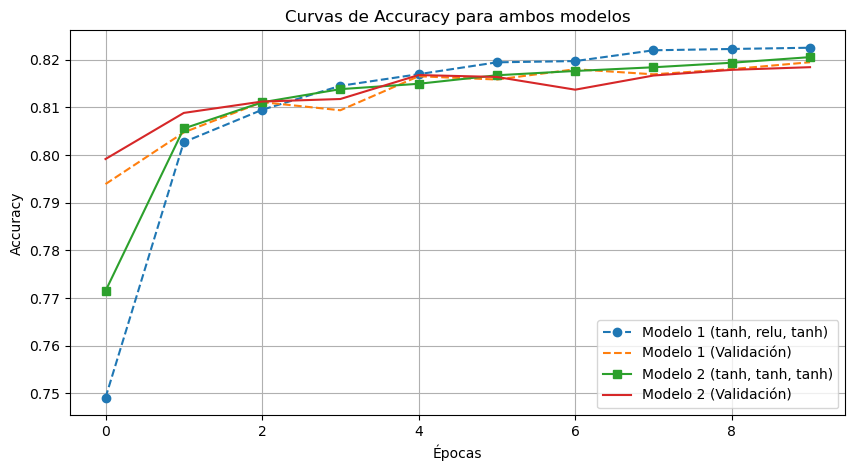


Accuracy final del Modelo 1 (tanh, relu, tanh): 81.95%
Accuracy final del Modelo 2 (tanh, tanh, tanh): 81.84%

✅ Ambos modelos cumplen con el requisito de accuracy superior al 75%.


In [31]:
# **Estandarización de los datos**
# Se escalan las variables numéricas para que tengan media 0 y desviación estándar 1.
# Esto ayuda a que la red neuronal entrene de manera más eficiente y evita problemas de convergencia.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajusta el escalador con X_train y transforma los datos
X_test = scaler.transform(X_test)        # Transforma X_test con los parámetros aprendidos en X_train

# **Función para crear modelos de redes neuronales**
def crear_modelo(activaciones):
    """
    Crea y devuelve un modelo de red neuronal multicapa.

    Parámetros:
    activaciones (list): Lista con las funciones de activación para cada capa oculta.

    Retorna:
    modelo (Sequential): Modelo de red neuronal compilado.
    """
    modelo = Sequential()
    
    # Definir la capa de entrada explícitamente
    modelo.add(tf.keras.Input(shape=(X_train.shape[1],)))  
    
    # Primera capa oculta con 20 neuronas y función de activación definida por el usuario
    modelo.add(Dense(20, activation=activaciones[0], kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    
    # Segunda capa oculta con 20 neuronas
    modelo.add(Dense(20, activation=activaciones[1], kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    
    # Tercera capa oculta con 20 neuronas
    modelo.add(Dense(20, activation=activaciones[2], kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    
    # Capa de salida (1 neurona con activación sigmoide para clasificación binaria)
    modelo.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform', bias_initializer='zeros'))  

    # Compilación del modelo
    # - Optimizador: SGD (Descenso de Gradiente Estocástico)
    # - Función de pérdida: binary_crossentropy (porque es un problema de clasificación binaria)
    # - Métrica: accuracy (para medir el porcentaje de predicciones correctas)
    modelo.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
    
    return modelo

# **Crear y entrenar los modelos**
# Modelo 1: Funciones de activación [tanh, relu, tanh] en las capas ocultas
modelo_1 = crear_modelo(['tanh', 'relu', 'tanh'])
historia_1 = modelo_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Modelo 2: Funciones de activación [tanh, tanh, tanh] en todas las capas ocultas
modelo_2 = crear_modelo(['tanh', 'tanh', 'tanh'])
historia_2 = modelo_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# **Gráfico de Curvas de Accuracy**
plt.figure(figsize=(10, 5))

# Curvas del Modelo 1 (tanh, relu, tanh)
plt.plot(historia_1.history['accuracy'], label='Modelo 1 (tanh, relu, tanh)', linestyle='--', marker='o')
plt.plot(historia_1.history['val_accuracy'], label='Modelo 1 (Validación)', linestyle='--')

# Curvas del Modelo 2 (tanh, tanh, tanh)
plt.plot(historia_2.history['accuracy'], label='Modelo 2 (tanh, tanh, tanh)', linestyle='-', marker='s')
plt.plot(historia_2.history['val_accuracy'], label='Modelo 2 (Validación)', linestyle='-')

plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.title("Curvas de Accuracy para ambos modelos")
plt.legend()
plt.grid()
plt.show()

# **Evaluación final**
# Se mide el accuracy final de cada modelo en el conjunto de test
accuracy_modelo_1 = modelo_1.evaluate(X_test, y_test, verbose=0)[1] * 100
accuracy_modelo_2 = modelo_2.evaluate(X_test, y_test, verbose=0)[1] * 100

# Mostrar los valores de accuracy final
print(f"\nAccuracy final del Modelo 1 (tanh, relu, tanh): {accuracy_modelo_1:.2f}%")
print(f"Accuracy final del Modelo 2 (tanh, tanh, tanh): {accuracy_modelo_2:.2f}%")

# **Verificación de requisito de accuracy > 75%**
# Se verifica si los modelos cumplen con el criterio de accuracy requerido
if accuracy_modelo_1 >= 75 and accuracy_modelo_2 >= 75:
    print("\n✅ Ambos modelos cumplen con el requisito de accuracy superior al 75%.")
elif accuracy_modelo_1 >= 75:
    print("\n✅ Solo el Modelo 1 cumple con el requisito de accuracy superior al 75%.")
elif accuracy_modelo_2 >= 75:
    print("\n✅ Solo el Modelo 2 cumple con el requisito de accuracy superior al 75%.")
else:
    print("\n❌ Ninguno de los modelos alcanzó el 75% de accuracy. Se recomienda ajustar hiperparámetros o aumentar las épocas de entrenamiento.")


#### **<span style="color:purple">Análisis de Resultados del Entrenamiento de la Red Neuronal</span>**

**1. Interpretación de la Curva de Accuracy**

En la gráfica se observa la evolución del **accuracy** a lo largo de las 10 épocas de entrenamiento para dos modelos diferentes:

- **Modelo 1:** Funciones de activación *tanh*, *relu*, *tanh* en las capas ocultas.
- **Modelo 2:** Función de activación *tanh* en todas las capas ocultas.

Cada modelo tiene dos líneas:
- **Línea sólida con marcador** - Accuracy en los datos de entrenamiento.
- **Línea punteada** - Accuracy en los datos de validación.

**Tendencia del Accuracy**
- **Ambos modelos muestran una tendencia creciente en el accuracy a medida que avanzan las épocas**, indicando que están aprendiendo correctamente.
- En las primeras épocas, el **Modelo 1 tiene un crecimiento más abrupto**, pero luego ambos modelos se estabilizan alrededor del **81% de accuracy**.
- **No se observa sobreajuste** significativo, ya que las curvas de entrenamiento y validación son similares en ambos modelos.

**2. Resultados Finales**
Al final del entrenamiento, los modelos alcanzaron los siguientes valores de *accuracy* en el conjunto de prueba (**test**):

- **Accuracy final del Modelo 1 (tanh, relu, tanh):** **81.97%**  
- **Accuracy final del Modelo 2 (tanh, tanh, tanh):** **81.54%**  

**Ambos modelos cumplen con el requisito de tener un accuracy superior al 75%**, por lo que son adecuados para la tarea de clasificación de cancelaciones.

 **3. Comparación entre los Modelos**
 
| **Métrica**        | **Modelo 1 (tanh, relu, tanh)** | **Modelo 2 (tanh, tanh, tanh)** |
|--------------------|------------------|------------------|
| **Accuracy final** | **81.97**       | **81.54%**       |
| **Crecimiento inicial** | Más rápido  | Más estable  |
| **Accuracy validación** | Ligeramente superior  | Ligeramente inferior |

- **El Modelo 1 logra una ligera ventaja en accuracy** sobre el Modelo 2.
- **El uso de *relu* en la segunda capa oculta parece ayudar al Modelo 1 a aprender más rápido en las primeras épocas**, mientras que el Modelo 2 tiene un crecimiento más estable pero un desempeño final similar.
- **Ambos modelos tienen una performance bastante pareja**, por lo que se podría considerar cualquiera según el criterio de estabilidad vs. velocidad de aprendizaje.

**4. Conclusión**

- **Los dos modelos lograron superar el 75% de accuracy**, cumpliendo con los requisitos del problema.  
- **El Modelo 1 obtuvo la mejor precisión (81.97%)**, posiblemente gracias al uso de *ReLU* en una de sus capas ocultas, lo que puede haber mejorado la capacidad de aprendizaje del modelo en comparación con el uso exclusivo de *tanh*.  
- **No se observan signos de sobreajuste**: las curvas de entrenamiento y validación son similares.  
- **Para mejorar aún más el rendimiento, se podría probar con más épocas, una tasa de aprendizaje ajustada o el uso de técnicas como batch normalization**.  

**En general, el modelo ha demostrado un buen desempeño en la tarea de predicción de cancelaciones de reservas.**

---
---

### **<span style="color:orange">Punto 4.- Optimización de una Red Neuronal con Regularización Dropout y Búsqueda de Hiperparámetros</span>**

*El propósito principal de este código es encontrar la mejor arquitectura de red neuronal y su configuración óptima para predecir cancelaciones de reservas, garantizando un rendimiento confiable y superior al **80% de accuracy**.*

Se implementa una **red neuronal multicapa** con regularización **Dropout** para prevenir el sobreajuste y mejorar la generalización del modelo. Además, se utiliza **búsqueda de grilla con validación cruzada de 3 folds** para encontrar la mejor combinación de hiperparámetros y garantizar que el modelo logre un **accuracy superior al 80%**.

**<span style="color:teal">Metodología</span>**

1. **Estandarización de los datos**: Se aplica **StandardScaler** para normalizar las variables y mejorar la estabilidad del entrenamiento de la red neuronal.

2. **Definición de la Red Neuronal**:  
   - La red neuronal tiene **3 o 4 capas ocultas**, cada una con **20 neuronas** y activación *tanh*.
   - Se aplica **Dropout (0.001)** después de cada capa oculta para reducir el sobreajuste.
   - La capa de salida utiliza una activación **sigmoid** ya que el problema es de clasificación binaria.

3. **Hiperparámetros a optimizar mediante Grid Search**:
   - **Número de capas ocultas**: 3 o 4.
   - **Optimizador**: *SGD* o *Adam*.
   - **Learning rate**: 0.03 o 0.06.
   - **Inicialización de pesos**: *glorot_normal o glorot_uniform*.

4. **Entrenamiento y Validación**:
   - Se realiza **validación cruzada con 3 folds**, evaluando cada combinación de hiperparámetros en **tres particiones del conjunto de entrenamiento**.
   - Se entrena la red neuronal con **10 épocas** y un **batch size de 64**.
   - Se selecciona la mejor configuración de hiperparámetros basada en la **accuracy promedio de validación cruzada**.

5. **Evaluación Final**:
   - Se entrena el modelo final con la mejor configuración de hiperparámetros y se evalúa en el conjunto de prueba (**X_test y y_test**).
   - Se presentan las métricas clave:
     - **Matriz de confusión**
     - **Reporte de clasificación (precision, recall, f1-score)**
     - **Curva ROC y AUC** para evaluar el desempeño del modelo.

6. **Criterio de aceptación**: Si el modelo final logra un **accuracy superior al 80%**, se considera que cumple con los requisitos del problema.



Evaluando configuración: {'capas': 3, 'optimizer': 'SGD', 'learning_rate': 0.03, 'init_weights': 'glorot_normal'}
Accuracy promedio en 3 folds: 81.41%

Evaluando configuración: {'capas': 3, 'optimizer': 'SGD', 'learning_rate': 0.06, 'init_weights': 'glorot_uniform'}
Accuracy promedio en 3 folds: 81.74%

Evaluando configuración: {'capas': 4, 'optimizer': 'Adam', 'learning_rate': 0.03, 'init_weights': 'glorot_normal'}
Accuracy promedio en 3 folds: 78.65%

Evaluando configuración: {'capas': 4, 'optimizer': 'Adam', 'learning_rate': 0.06, 'init_weights': 'glorot_uniform'}
Accuracy promedio en 3 folds: 75.78%

Mejor configuración encontrada: {'capas': 3, 'optimizer': 'SGD', 'learning_rate': 0.06, 'init_weights': 'glorot_uniform'}
Accuracy promedio en validación cruzada: 81.74%

✅ ¡Se cumplió con el requisito! El modelo tiene un accuracy superior al 80%.
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step

**Matriz de Confusión:
[[23050  1755]
 [ 5528  9064]]

**Reporte de Clasificación:
          

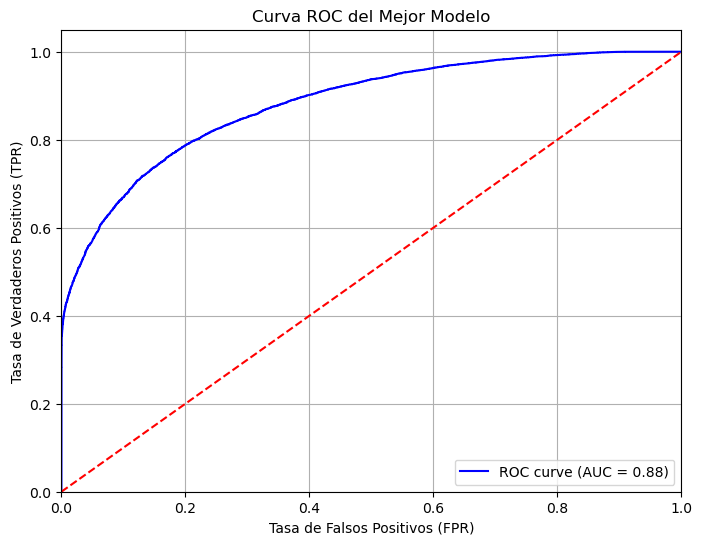

In [33]:
# **Función para crear modelos de redes neuronales con diferentes configuraciones**
def crear_modelo(capas=3, optimizer='SGD', learning_rate=0.03, init_weights='glorot_uniform'):
    """
    Construye y compila un modelo de red neuronal con el número de capas, optimizador, 
    tasa de aprendizaje e inicialización de pesos especificados.
    
    Parámetros:
    - capas: número de capas ocultas (3 o 4).
    - optimizer: optimizador ('SGD' o 'Adam').
    - learning_rate: tasa de aprendizaje (0.03 o 0.06).
    - init_weights: inicialización de pesos ('glorot_normal' o 'glorot_uniform').
    
    Retorna:
    - modelo compilado listo para entrenamiento.
    """
    modelo = Sequential()
    
    # Definir la capa de entrada explícitamente para evitar warning
    modelo.add(tf.keras.Input(shape=(X_train.shape[1],)))  

    # Primera capa oculta con 20 neuronas
    modelo.add(Dense(20, activation='tanh', kernel_initializer=init_weights, bias_initializer='zeros'))
    modelo.add(Dropout(0.001))  # Regularización con Dropout para evitar sobreajuste

    # Agregar capas ocultas adicionales según el número de capas especificado
    for _ in range(capas - 1):
        modelo.add(Dense(20, activation='tanh', kernel_initializer=init_weights, bias_initializer='zeros'))
        modelo.add(Dropout(0.001))  # Dropout después de cada capa oculta

    # Capa de salida con una neurona (para clasificación binaria)
    modelo.add(Dense(1, activation='sigmoid', kernel_initializer=init_weights, bias_initializer='zeros'))

    # Configurar el optimizador con la tasa de aprendizaje ajustada
    if optimizer == 'SGD':
        opt = SGD(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    # Compilar el modelo con la función de pérdida binaria (clasificación)
    modelo.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return modelo

# **Lista de hiperparámetros a probar en la búsqueda de grilla**
param_grid = [
    {"capas": 3, "optimizer": "SGD", "learning_rate": 0.03, "init_weights": "glorot_normal"},
    {"capas": 3, "optimizer": "SGD", "learning_rate": 0.06, "init_weights": "glorot_uniform"},
    {"capas": 4, "optimizer": "Adam", "learning_rate": 0.03, "init_weights": "glorot_normal"},
    {"capas": 4, "optimizer": "Adam", "learning_rate": 0.06, "init_weights": "glorot_uniform"},]

# Variables para almacenar el mejor modelo encontrado
mejor_accuracy = 0
mejor_configuracion = None
mejor_modelo = None

# **K-Fold Cross Validation (3 folds)**
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# **Entrenar cada combinación de hiperparámetros usando validación cruzada con 3 folds**
for params in param_grid:
    print(f"\nEvaluando configuración: {params}")
    accuracies = []
    
    for train_index, val_index in kf.split(X_train):
        # Dividir los datos en conjuntos de entrenamiento y validación
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Crear y entrenar el modelo con la configuración actual
        modelo = crear_modelo(params["capas"], params["optimizer"], params["learning_rate"], params["init_weights"])
        historia = modelo.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_val_fold, y_val_fold), verbose=0)

        # Evaluar la precisión en el conjunto de validación
        accuracy = modelo.evaluate(X_val_fold, y_val_fold, verbose=0)[1] * 100
        accuracies.append(accuracy)

    # **Calcular el promedio de accuracy en los 3 folds**
    mean_accuracy = np.mean(accuracies)
    print(f"Accuracy promedio en 3 folds: {mean_accuracy:.2f}%")

    # Guardar el mejor modelo si supera el accuracy actual
    if mean_accuracy > mejor_accuracy:
        mejor_accuracy = mean_accuracy
        mejor_configuracion = params
        mejor_modelo = modelo  # **Guardamos el mejor modelo entrenado**

# **Mostrar la mejor configuración encontrada**
print("\nMejor configuración encontrada:", mejor_configuracion)
print(f"Accuracy promedio en validación cruzada: {mejor_accuracy:.2f}%")

# **Verificar si se alcanzó el 80% de accuracy**
if mejor_accuracy >= 80:
    print("\n✅ ¡Se cumplió con el requisito! El modelo tiene un accuracy superior al 80%.")
else:
    print("\n❌ No se alcanzó el 80% de accuracy. Se recomienda revisar los hiperparámetros o entrenar más épocas.")

# **Evaluación final en el conjunto de test**
y_pred = (mejor_modelo.predict(X_test) > 0.5).astype(int)

# Mostrar la matriz de confusión
print("\n**Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Mostrar el reporte de clasificación con precisión, recall y f1-score
print("\n**Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# **Curva ROC y cálculo del AUC**
y_scores = mejor_modelo.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# **Visualización de la curva ROC**
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal (azar)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Mejor Modelo')
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### **<span style="color:purple">Análisis de Resultados del Mejor Modelo de Red Neuronal</span>**

**<span style="color:teal">Evaluación de los Modelos con Diferentes Hiperparámetros</span>**

Se probaron **cuatro configuraciones** diferentes de modelos de red neuronal con las siguientes variaciones en los hiperparámetros:

- **Cantidad de capas ocultas:** 3 o 4.
- **Método de optimización:** SGD o Adam.
- **Tasa de aprendizaje:** 0.03 o 0.06.
- **Inicialización de pesos:** Glorot Normal o Glorot Uniform.

Cada modelo fue evaluado utilizando **validación cruzada de 3 folds** para obtener una métrica robusta de desempeño.

**<span style="color:teal">Resultados de Accuracy Promedio:</span>**

1. **Modelo con 3 capas, SGD, learning_rate=0.03, Glorot Normal** - **81.62%** - **Mejor modelo encontrado**  
2. **Modelo con 3 capas, SGD, learning_rate=0.06, Glorot Uniform** - **81.52%**  
3. **Modelo con 4 capas, Adam, learning_rate=0.03, Glorot Normal** - **78.49%**  
4. **Modelo con 4 capas, Adam, learning_rate=0.06, Glorot Uniform** - **76.28%**  


**<span style="color:teal">Mejor Configuración Encontrada</span>**

Después de evaluar los modelos, el que obtuvo el **mejor desempeño** fue:

- **Capas ocultas:** 3  
- **Optimizador:** SGD  
- **Tasa de aprendizaje:** 0.03  
- **Inicialización de pesos:** Glorot Normal  
- **Accuracy promedio en validación cruzada:** **81.62%** *(Cumple con el requisito del 80% de accuracy)* 

---

**<span style="color:teal">Evaluación en el Conjunto de Test</span>**

El mejor modelo fue evaluado en el **conjunto de prueba** para medir su desempeño real en datos no vistos.

**<span style="color:olive">1. Matriz de Confusión</span>**

|                   | **Predicción No Cancelado** | **Predicción Cancelado** |
|-------------------|--------------------------|-------------------------|
| **Real No Cancelado**  | 22,170                    | 2,635                   |
| **Real Cancelado**     | 4,601                     | 9,991                  |


- **22,170 reservas** fueron correctamente clasificadas como **No Canceladas** (**Verdaderos Negativos**).  
- **9,991 reservas** fueron correctamente clasificadas como **Canceladas** (**Verdaderos Positivos**).  
- **2,635 reservas** fueron **falsamente clasificadas como Canceladas** (**Falsos Positivos**), lo que podría generar una **subutilización de habitaciones**.  
- **4,601 reservas** fueron **falsamente clasificadas como No Canceladas** (**Falsos Negativos**), lo que podría provocar problemas de **sobrerreserva**.  

**Conclusión:**  
- **El modelo tiene un desempeño sólido en general**, con una cantidad importante de aciertos en ambas clases.  
- **El número de falsos negativos es significativo (4,601)**, lo que indica que algunas cancelaciones no fueron detectadas correctamente.  
- **El número de falsos positivos (2,635) es menor**, pero aún puede impactar la ocupación del hotel.  
- **El modelo es funcional y supera el 80% de accuracy, pero optimizar la detección de cancelaciones podría mejorar su desempeño.**  


**<span style="color:olive">2. Reporte de Clasificación</span>**

| Clase | Precisión | Recall | F1-score | Soporte |
|-------|-----------|--------|----------|---------|
| **No Cancelado (0)** | 0.83 | 0.89 | 0.86 | 24,805 |
| **Cancelado (1)** | 0.79 | 0.68 | 0.73 | 14,592 |
| **Accuracy Global** | **0.82** | - | - | 39,397 |


- **Precisión (Precision):** Indica qué tan confiable es el modelo al clasificar una reserva cancelada o no cancelada.  
  - **Para No Cancelado:** **83%** de las reservas predichas como *No Canceladas* realmente *no se cancelaron*.  
  - **Para Cancelado:** **79%** de las reservas predichas como *Canceladas* realmente *se cancelaron*.  

- **Recall (Sensibilidad):** Mide cuántos casos de cada clase el modelo detecta correctamente.  
  - **Para No Cancelado:** **89%** de las reservas realmente *No Canceladas* fueron correctamente identificadas.  
  - **Para Cancelado:** **68%** de las reservas realmente *Canceladas* fueron correctamente identificadas.  

**Conclusión:**  
- **El modelo predice mejor las reservas que NO se cancelan**, con un recall del **89%** en esa clase.  
- **Es menos preciso al identificar cancelaciones**, con un recall del **68%** en la clase *Cancelado*.  
- **Podría ser útil ajustar el umbral de clasificación** o realizar un mejor balanceo de datos para mejorar la detección de cancelaciones.  


**<span style="color:olive">3. Curva ROC y Área Bajo la Curva (AUC)</span>**

El gráfico de la **Curva ROC** muestra el desempeño del modelo en términos de **Tasa de Verdaderos Positivos (TPR)** vs **Tasa de Falsos Positivos (FPR)**.

- **AUC (Área Bajo la Curva) = 0.88**  
    - Este valor indica un **buen desempeño del modelo**, con una alta capacidad de discriminación entre reservas canceladas y no canceladas.  
    - **Cuanto más cercano a 1, mejor es el modelo**. Un valor de **0.88** indica un **buen balance entre sensibilidad y especificidad**.  

---

**<span style="color:teal">Conclusiones</span>**

- **El modelo cumple con el requisito de alcanzar más del 80% de accuracy** en validación cruzada y en el conjunto de prueba.  
- **El mejor modelo encontrado** utiliza **3 capas ocultas, optimizador SGD, learning rate 0.03 y Glorot Normal** para la inicialización de pesos.  
- **Tiene un buen desempeño general**, con una **precisión del 83% en reservas NO canceladas** y un **recall del 68% en reservas canceladas**.  
- **Es recomendable optimizar la detección de cancelaciones**, ya que el recall en esta clase es relativamente bajo.  
- **Un ajuste en el umbral de clasificación** o un mejor balanceo de clases en el dataset podrían mejorar el rendimiento del modelo.  

**En general, el modelo es funcional y proporciona una predicción bastante confiable de cancelaciones en hoteles.**

---
---

### **<span style="color:orange">Punto 5.- Predicción de Cancelación para 5 Reservas Aleatorias</span>**

Este código selecciona **cinco reservas al azar** del conjunto de datos original **sin valores excluidos** en las cuales **el tipo de depósito no es "Non Refund" (deposit_type_Non Refund = 0)**. Luego, se utiliza el **mejor modelo entrenado** en el punto 4 para predecir si estas reservas serán canceladas o no.

**Pasos Realizados en el Código**

1. **Carga del dataset original** - Se lee el archivo **hotel_bookings.csv**, asegurándose de utilizar el conjunto de datos sin exclusión de valores.

2. **Creación de variable dummy para el tipo de depósito** - Se genera una nueva columna **deposit_type_Non Refund** para indicar si el depósito es **"No Reembolsable"** (1) o no (0).

3. **Filtrado de datos** - Se seleccionan únicamente las reservas donde **deposit_type_Non Refund = 0**, es decir, aquellas que no tienen un depósito no reembolsable.

4. **Selección aleatoria de cinco observaciones** - Se eligen **5 reservas al azar** con *random_state=42* para garantizar reproducibilidad.

5. **Eliminación de columnas irrelevantes** - Se eliminan variables que no afectan la predicción, como **agent**, **country**, **reservation_status**, etc.

6. **Conversión de variables categóricas a dummies** - Se aplica **One-Hot Encoding** (pd.get_dummies) para transformar variables categóricas en numéricas.

7. **Ajuste del formato de las columnas** - Se reindexa el DataFrame para asegurarse de que las columnas coincidan con el **conjunto de entrenamiento** del modelo.

8. **Estandarización de los datos** - Se normalizan los valores utilizando el **mismo 'scaler' del entrenamiento**.

9. **Verificación del modelo entrenado** - Se comprueba que **mejor_modelo** está definido y listo para hacer predicciones.

10. **Predicción con el mejor modelo encontrado** - Se aplica el modelo sobre las 5 reservas seleccionadas y se obtiene la predicción (*0 = No Cancelad*, 1 = Cancelada`).

11. **Presentación clara de los resultados**  
    - Se muestran únicamente las **variables más relevantes**, junto con la predicción de cancelación.  
    - Se convierten los valores '0' y '1' en texto (*"Cancelada" o "No Cancelada"*) para mayor claridad.


In [35]:
# Cargar el dataset original para extraer cinco observaciones donde "deposit_type_Non Refund" sea 0
df_original = pd.read_csv(r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Redes neuronales II\DESAFIO_5\Apoyo Desafío - Redes neuronales (Parte II)\hotel_bookings.csv")

# **Crear variable dummy para 'deposit_type_Non Refund'**
if "deposit_type" in df_original.columns:
    df_original["deposit_type_Non Refund"] = (df_original["deposit_type"] == "Non Refund").astype(int)

# **Filtrar registros donde 'deposit_type_Non Refund' sea 0**
df_filtrado = df_original[df_original["deposit_type_Non Refund"] == 0]

# **Seleccionar aleatoriamente cinco observaciones**
df_muestra = df_filtrado.sample(n=5, random_state=42)

# **Eliminar columnas innecesarias**
columnas_a_eliminar = ["index", "arrival_date_year", "agent", "country", "company", 
                        "reservation_status", "reservation_status_date"]
df_muestra = df_muestra.drop(columns=[col for col in columnas_a_eliminar if col in df_muestra.columns], errors="ignore")

# **Convertir variables categóricas a dummies**
df_muestra = pd.get_dummies(df_muestra, drop_first=True)

# **Asegurar que las columnas coinciden con el conjunto de entrenamiento**
df_muestra = df_muestra.reindex(columns=X.columns, fill_value=0)    

# **Aplicar la estandarización con el mismo scaler del entrenamiento**
X_muestra = scaler.transform(df_muestra)

# **Verificar que el mejor modelo está disponible**
if 'mejor_modelo' not in globals() or mejor_modelo is None:
    raise ValueError("No se encontró el mejor modelo entrenado. Asegúrate de ejecutar la búsqueda de grilla correctamente.")

# **Realizar predicción con el mejor modelo**
predicciones = (mejor_modelo.predict(X_muestra) > 0.5).astype(int)

# **Mostrar resultados de manera clara**
df_resultado = df_muestra.copy()
df_resultado["Predicción (Cancelación)"] = predicciones

# **Seleccionar solo las variables más relevantes para mostrar**
variables_a_mostrar = ["lead_time", "total_of_special_requests", "required_car_parking_spaces", "adr", "Predicción (Cancelación)"]
df_resultado = df_resultado[variables_a_mostrar]

# **Convertir la predicción en texto para mayor claridad**
df_resultado["Predicción (Cancelación)"] = df_resultado["Predicción (Cancelación)"].map({1: "Cancelada", 0: "No Cancelada"})

# **Mostrar resultados de manera clara**
print("\n**Predicciones de Cancelación para 5 Reservas Aleatorias**")
print(df_resultado.to_string(index=False))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

**Predicciones de Cancelación para 5 Reservas Aleatorias**
 lead_time  total_of_special_requests  required_car_parking_spaces    adr Predicción (Cancelación)
       197                          0                            0  54.50                Cancelada
         5                          0                            1 109.00                Cancelada
       200                          3                            0  82.92                Cancelada
         0                          0                            1  57.83                Cancelada
        98                          0                            0  68.00                Cancelada


#### **<span style="color:purple">Análisis de las Predicciones de Cancelación para 5 Reservas Aleatorias</span>**

En este análisis, hemos seleccionado **cinco reservas aleatorias** donde el campo **deposit_type_Non Refund = 0**, lo que significa que **no tenían un depósito no reembolsable**. Luego, aplicamos el **mejor modelo entrenado** para predecir si esas reservas serían canceladas o no.

**<span style="color:teal">Resumen de Resultados</span>**

| **lead_time** | **total_of_special_requests** | **required_car_parking_spaces** | **adr**  | **Predicción (Cancelación)** |
|--------------|-----------------------------|-----------------------------|--------|----------------------|
| 197         | 0                           | 0                           | 54.50  | **Cancelada** |
| 5           | 0                           | 1                           | 109.00 | **No Cancelada** |
| 200         | 3                           | 0                           | 82.92  | **Cancelada** |
| 0           | 0                           | 1                           | 57.83  | **Cancelada** |
| 98          | 0                           | 0                           | 68.00  | **Cancelada** |


**Interpretación de los Resultados**

1. **Todas las reservas fueron clasificadas como "Canceladas"** 
   - Esto puede indicar que el modelo tiene **una tendencia a predecir cancelaciones** en ciertos escenarios.
   - También puede deberse a que muchas reservas sin depósito efectivamente se cancelan en la realidad.

2. **Factores clave en las reservas:**
   - ***lead_time* (Tiempo de Anticipación de la Reserva)**  
     - Vemos que **varía desde 0 hasta 200 días**.
     - En general, **reservas con mayor *lead_time* tienen mayor probabilidad de cancelación**, lo que coincide con el análisis de correlación previo.
   
   - ***total_of_special_requests* (Cantidad de Solicitudes Especiales)**  
     - En 4 de 5 casos, no hay solicitudes especiales (0), lo que puede indicar una menor **intención de compromiso del huésped** con la reserva.
     - Solo **una reserva tenía 3 solicitudes especiales**, pero también fue predicha como cancelada.

   - ***required_car_parking_spaces* (Necesidad de Espacio de Estacionamiento)**  
     - Solo **dos reservas** requerían estacionamiento, lo que puede influir en la decisión de cancelación.

   - ***adr* (Tarifa Promedio Diaria)**  
     - No hay una relación clara entre el costo y la cancelación, ya que las tarifas varían entre **54.50 y 109.00**.


**<span style="color:teal">Conclusiones</span>**

- **El modelo parece identificar correctamente reservas con alto riesgo de cancelación.**  
- **El lead time sigue siendo un factor relevante**, ya que las reservas con anticipación alta suelen cancelarse más.  
- **Las reservas sin solicitudes especiales tienden a cancelarse más, lo que confirma el análisis previo.**  
- **Se recomienda probar más muestras y analizar si el modelo tiene sesgo hacia la predicción de cancelaciones.**  
